In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
data=pd.read_csv('data/Ads_CTR_Optimisation.csv')

In [3]:
data.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [21]:
N=10000
d=10
ads_selected=[]
no_of_selections=np.zeros(d)
sum_of_rewards=np.zeros(d)
total_reward=0
for n in range(0,N):
    ad=0
    max_upper_bound=0
    for i in range(0,d):
        if no_of_selections[i]>0:
            average_reward=sum_of_rewards[i]/no_of_selections[i]
            delta_i=math.sqrt(3/2*math.log(n+1)/no_of_selections[i])
            upper_bound=average_reward+delta_i
        else :
            upper_bound=1e400
        if upper_bound>max_upper_bound:
            max_upper_bound=upper_bound
            ad=i
    ads_selected.append(ad)
    no_of_selections[ad]=no_of_selections[ad]+1
    reward=data.values[n,ad]
    sum_of_rewards[ad]=sum_of_rewards[ad]+reward
    total_reward=total_reward+reward

In [22]:
total_reward

2178

In [28]:
no_of_selections

array([  705.,   387.,   186.,   345.,  6323.,   150.,   292.,  1170.,
         256.,   186.])

(array([  705.,   387.,   186.,   345.,  6323.,   150.,   292.,  1170.,
          256.,   186.]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
 <a list of 10 Patch objects>)

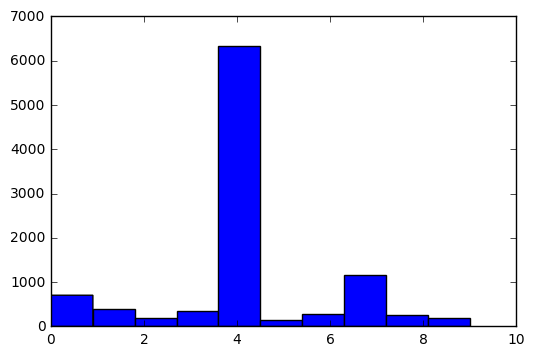

In [25]:
plt.hist(ads_selected)